<a href="https://colab.research.google.com/github/m0zzarella/Fundus-Imaging/blob/main/Macula_segmentation_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # Import the necessary libraries
import os
from PIL import Image
import numpy as np
import cv2
from skimage import io
from skimage.filters import threshold_otsu
from skimage.morphology import opening
from skimage.filters import gaussian
from skimage.filters import difference_of_gaussians
from skimage.morphology import dilation
from skimage.transform import hough_circle
from skimage.feature import peak_local_max
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
from google.colab.patches import cv2_imshow
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
common_src = '/content/drive/MyDrive/Macula_Segment'
common_seg_src = '/content/drive/MyDrive/Macula_Segment/horizontal' 
common_dst = '/content/drive/MyDrive/Macula_Segment/macula_marked' 
correct_ones_src = '/content/drive/MyDrive/Macula_Segment/correct_od'
save_here = common_src + 'MS/'
dst_roi = common_src + 'ROI/'

In [ ]:
# Set the source and destination folders
src_folders = ['Total eye care/NORMAL', 'Total eye care/ARMD', 'DRIVE/In PNG/train/image', 'DRIVE/In PNG/test/image', 'Aria Dataset/aria_a_markups', 'Only ARMD/test', 'Only ARMD/train', 'Only ARMD/valid']
dst_folders = ['Total eye care normal', 'Total eye care ARMD', 'DRIVE train', 'DRIVE test', 'Aria', 'Only ARMD/test', 'Only ARMD/train', 'Only ARMD/validate']

In [ ]:
def circle_brightest_part(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Blur the image to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Find the coordinates of the brightest pixel in the image
    minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(blurred)

    # Draw a circle centered at the coordinates of the brightest pixel
    brightest_part = cv2.circle(image, maxLoc, 30, (255, 0, 0), 2)

    return brightest_part, list(maxLoc)

In [ ]:
def plot_result(l):
    fig, axs = plt.subplots(3, 2, figsize = (20, 30))
    k = 0
    # Display the images in the subplots
    for i in range(3):
        for j in range(2):
            axs[i, j].imshow(l[k])
            k += 1

    # Remove the axis labels and ticks
    for ax in axs.flat:
        ax.set_axis_off()
    
    return plt

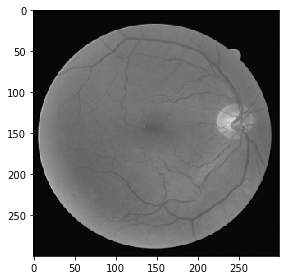

In [ ]:
io.imshow(gray)

In [ ]:
# Preprocess the image (optional)
gray = cv2.GaussianBlur(gray, (3, 3), 0)
gray = cv2.equalizeHist(gray)
            
# Get the coordinates of the optic disc
od_marked, loc = circle_brightest_part(image)
        
loc

[240, 134]

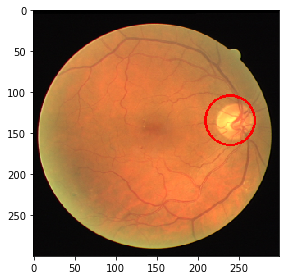

In [ ]:
io.imshow(image)

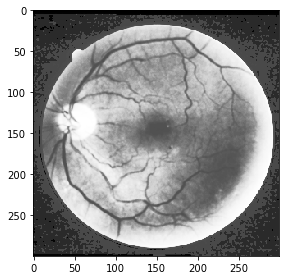

In [ ]:
# Get the green channel of the cropped ROI        
x = loc[0]
width, height = size
        
# If the optic disc is on the right side
if x > width // 2:
    # Flip the image horizontally
    gray = cv2.flip(gray, 1)
    image = cv2.flip(image, 1)
    # Get the x-coordinate of the center in the flipped image
    loc[0] = width - x 
        
io.imshow(gray)

In [ ]:
loc

[60, 134]

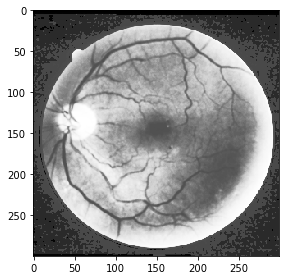

In [ ]:
io.imshow(gray)

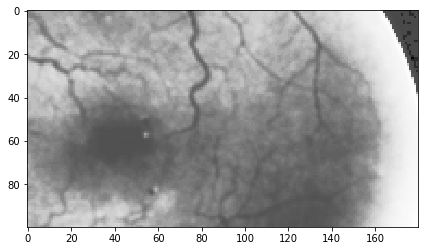

In [ ]:
y1 = loc[0] + radius # 50 + the x-coordinate of the OD 
y2 = size[1] - 10 # Leaving 10 pixel from the right-most end
x1 = int(loc[1] - radius) # y-coordinate of the OD - 50
x2 = int(loc[1] + radius) # y-coordinate of the OD + 50
    
        
img = gray[x1:x2, y1:y2]

io.imshow(img)

In [ ]:
image = img.copy()
mask = np.zeros_like(image)
darkest = 255
darkest_tiles = list()
i, j = 0, 0
for y in range(0, image.shape[0], tile_size[1]):
    for x in range(0, image.shape[1], tile_size[0]):
        
        # Calculate the average pixel value of the current tile
        avg_px = cv2.mean(image[y:y + tile_size[1], x:x + tile_size[0]])[0]
        if avg_px < 90:
            darkest = avg_px
            darkest_tiles.append([i, j, darkest])
            mask[y:y + tile_size[1], x:x + tile_size[0]] = 255

        i += 1
    j += 1
    i = 0
                
roi = cv2.bitwise_and(mask, img)

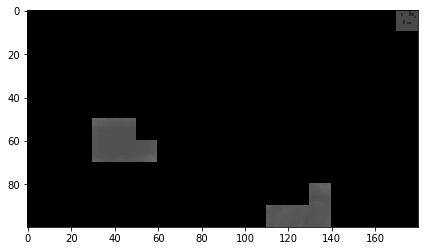

In [ ]:
io.imshow(roi)

In [ ]:
orig_img, gray, gray_updated, OD, gray_cropped, roi

# Looping:

In [ ]:
size = (300, 300)
grid_space = 10
tile_size = (grid_space, grid_space)
radius = 50
save_here = common_src + '50/'
dst_roi = common_src + 'ROI_50/'

img_src = correct_ones_src
coordinates = dict()

# Loop through all the files in the source folder
for filename in os.listdir(img_src):
    to_save = list()
    print(f"Processing {filename} from {img_src}...")
    
    # Load the image and convert it to grayscale
    image = io.imread(img_src + filename)
    image = cv2.resize(image, size)
    img = image.copy()
    img_save = image.copy()
    to_save.append(image)
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    to_save.append(gray)
    
    # Preprocess the image (optional)
    gray = cv2.GaussianBlur(gray, (3, 3), 0)
    gray = cv2.equalizeHist(gray)
            
    # Get the coordinates of the optic disc
    od_marked, loc = circle_brightest_part(image)
    to_save.append(od_marked)
    
    # Get the green channel of the cropped ROI        
    x = loc[0]
    width, height = size
        
    # If the optic disc is on the right side
    if x > width // 2:
        # Flip the image horizontally
        gray = cv2.flip(gray, 1)
        image = cv2.flip(image, 1)
        img_save = cv2.flip(img_save, 1)
        # Get the x-coordinate of the center in the flipped image
        loc[0] = width - x 
    io.imsave(common_src + 'Resized/' + filename, img_save)
        
    to_save.append(gray)
        
    y1 = loc[0] + radius # 50 + the x-coordinate of the OD 
    y2 = size[1] - 50 # Leaving 50 pixel from the right-most end
    x1 = int(loc[1] - radius) # y-coordinate of the OD - 50
    x2 = int(loc[1] + radius) # y-coordinate of the OD + 50
    coordinates[filename] = [x1, x2, y1, y2]
    
        
    img = gray[x1:x2, y1:y2]
    img = cv2.GaussianBlur(img, (3, 3), 0)
    img = cv2.equalizeHist(img)
    to_save.append(img)
    
    
    image = img.copy()
    mask = np.zeros_like(image)
    darkest = 255
    darkest_tiles = list()
    i, j = 0, 0
    for y in range(0, image.shape[0], tile_size[1]):
        for x in range(0, image.shape[1], tile_size[0]):
        
            # Calculate the average pixel value of the current tile
            avg_px = cv2.mean(image[y:y + tile_size[1], x:x + tile_size[0]])[0]
            if avg_px < 60:
                darkest = avg_px
                darkest_tiles.append([i, j, darkest])
                mask[y:y + tile_size[1], x:x + tile_size[0]] = 255

            i += 1
        j += 1
        i = 0
                
    roi = cv2.bitwise_and(mask, img)
    to_save.append(roi)
    io.imsave(dst_roi + filename, roi)
    
    # Create a figure with six subplots
    plot = plot_result(to_save)

    # Get the entire destination for saving the masked image
    dst = save_here + filename
            
    # Save the stripped image in the destination folder
    plot.savefig(dst)
        
    print(f"SUCCESS")
print("\t\tALL DONE!")

		ALL DONE!


In [ ]:
dst_roi = common_src + 'ROI_50/'
image = io.imread(common_src + 'Resized/19_test.png')
mask = io.imread(dst_roi + '19_test.png')

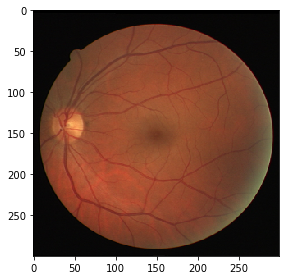

In [ ]:
io.imshow(image)

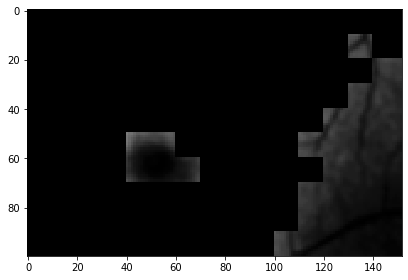

In [ ]:
io.imshow(mask)

In [ ]:
coor_x, coor_y = coordinates['19_test.png'][2], coordinates['19_test.png'][0]

In [ ]:
# Loop through the columns of the mask
for i in range(mask.shape[1]):
    # Find the indices of the first non-zero element in the column
    indices = np.argwhere(mask[:, i])

    # If the column contains non-zero elements, select the top-most element and extract its coordinates
    if indices.size > 0:
        top = indices[0]
        x, y = i, top[0]
        break

# Print the coordinates
print(f'The coordinates of the first non-zero pixel are ({x}, {y}).')

The coordinates of the first non-zero pixel are (40, 50).


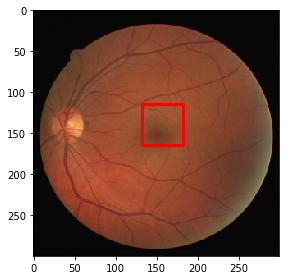

In [ ]:
x1 = coor_x + x - 5
y1 = coor_y + y - 25
cv2.rectangle(image, (x1, y1), (x1+50, y1+50), (255, 0, 0), 2)
io.imshow(image)

# Looping

In [ ]:
dst_marked = common_src + 'MM/'
img_src = common_src + 'Resized/'
for filename in os.listdir(img_src):
    print(f"Processing {filename} from {img_src}...")
    
    # Load the image and convert it to grayscale
    image = io.imread(img_src + filename)
    img = image.copy()
    mask = io.imread(dst_roi + filename)
    
    # Loop through the columns of the mask
    for i in range(mask.shape[1]):
        # Find the indices of the first non-zero element in the column
        indices = np.argwhere(mask[:, i])

        # If the column contains non-zero elements, select the top-most element and extract its coordinates
        if indices.size > 0:
            top = indices[0]
            x, y = i, top[0]
            break
            
    coor_x, coor_y = coordinates[filename][2], coordinates[filename][0]
    
    
    x1 = coor_x + x - 5
    y1 = coor_y + y - 25
    cv2.rectangle(image, (x1, y1), (x1 + 50, y1 + 50), (0, 0, 0), 2)
    io.imsave(dst_marked + filename, image)
    print("SUCCESS")
print("\t\tAll done!")


Processing 01_test.png from D:/Professional/Jadavpur/Sem 3/Resized/...
SUCCESS
Processing 02_test.png from D:/Professional/Jadavpur/Sem 3/Resized/...
SUCCESS
Processing 03_test.png from D:/Professional/Jadavpur/Sem 3/Resized/...
SUCCESS
Processing 04_test.png from D:/Professional/Jadavpur/Sem 3/Resized/...
SUCCESS
Processing 05_test.png from D:/Professional/Jadavpur/Sem 3/Resized/...
SUCCESS
Processing 06_test.png from D:/Professional/Jadavpur/Sem 3/Resized/...
SUCCESS
Processing 07_test.png from D:/Professional/Jadavpur/Sem 3/Resized/...
SUCCESS
Processing 08_test.png from D:/Professional/Jadavpur/Sem 3/Resized/...
SUCCESS
Processing 09_test.png from D:/Professional/Jadavpur/Sem 3/Resized/...
SUCCESS
Processing 10_test.png from D:/Professional/Jadavpur/Sem 3/Resized/...
SUCCESS
Processing 11_test.png from D:/Professional/Jadavpur/Sem 3/Resized/...
SUCCESS
Processing 12_test.png from D:/Professional/Jadavpur/Sem 3/Resized/...
SUCCESS
Processing 13_test.png from D:/Professional/Jadavpur